In [1]:
from skimage import io as skio
import matplotlib.pyplot as plt
from skimage import data
from skimage.color import rgb2hsv
import numpy as np
import platform
import tempfile
import os
from haze_functions import dark_channel, atmosphere_light, transmission
# necessite scikit-image 

In [14]:
im = skio.imread("haze_image/trees-1587301_1280.jpg")

darkchannel = dark_channel(im,19)

image_gray = np.mean(im, axis=2).astype(np.uint8)

lol = atmosphere_light(im, darkchannel, 0.001)

t = transmission(im, lol, 0.95, 19)


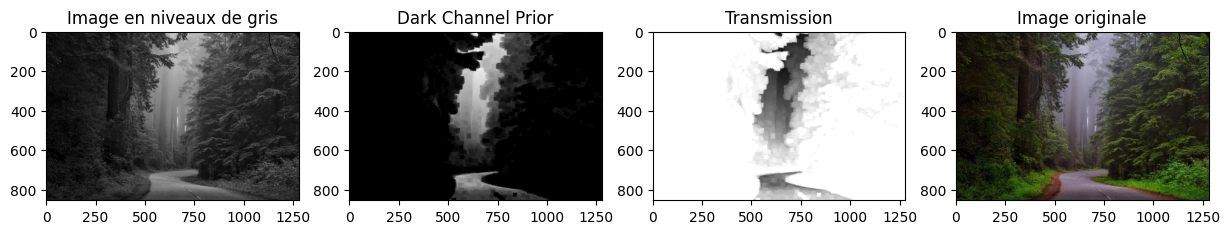

In [15]:
fig, axes = plt.subplots(1, 4, figsize=(15, 15))

axes[0].imshow(image_gray, cmap='gray', )  # Utilisez 'gray' pour les images en niveaux de gris
axes[0].set_title('Image en niveaux de gris')

axes[1].imshow(darkchannel, cmap='gray')
axes[1].set_title('Dark Channel Prior')

axes[2].imshow(t, cmap='gray')
axes[2].set_title('Transmission')

axes[3].imshow(im)
axes[3].set_title('Image originale')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[251 252 255]
(854, 1280, 3)
[[[ 24.  16.   5.]
  [ 13.   4.   1.]
  [ 11.   2.   1.]
  ...
  [ 16.  11.   7.]
  [ 14.   9.   5.]
  [ 19.  14.  10.]]

 [[ 30.  23.  13.]
  [ 34.  25.  18.]
  [ 15.   6.   1.]
  ...
  [ 18.  13.   9.]
  [ 16.  11.   7.]
  [ 19.  14.  10.]]

 [[ 33.  26.  20.]
  [ 25.  17.  14.]
  [ 24.  14.  13.]
  ...
  [ 16.  11.   5.]
  [ 16.  11.   5.]
  [ 18.  13.   7.]]

 ...

 [[  8.  16.   5.]
  [  7.  13.   1.]
  [ 11.  15.   1.]
  ...
  [ 21.  28.   1.]
  [  3.  21.   1.]
  [ 25.  56.  25.]]

 [[ 40.  51.  17.]
  [ 12.  21.   1.]
  [ 30.  36.  10.]
  ...
  [133. 137.  86.]
  [  6.  22.   1.]
  [ 16.  45.  15.]]

 [[ 37.  52.  11.]
  [ 36.  48.  12.]
  [ 39.  45.  17.]
  ...
  [ 88.  91.  38.]
  [ 65.  80.  39.]
  [ 20.  45.  16.]]]


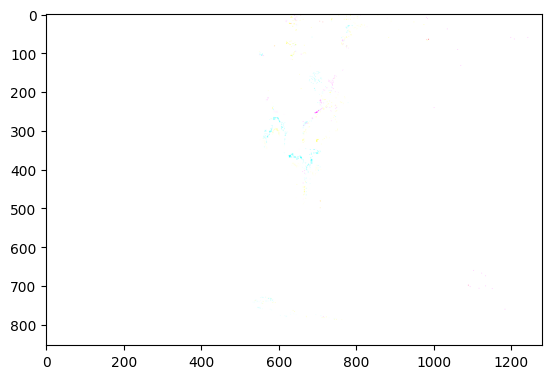

In [17]:
def haze_remove(im, A, t, t0):
    reshaped_t = t[:, :, np.newaxis].repeat(3, axis=2)
    print(A)
    
    withouthaze = (im-A)/np.maximum(reshaped_t, t0) + A
    withouthaze = withouthaze-255
    return withouthaze%255

final = haze_remove(im, lol, t, 0.1)
print(np.shape(final))
print(final)
plt.imshow(final)
plt.show()